In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

<img src="imgs/logistic_regr_binary.jpg" alt="Logistic Regression Binary" style="width:400px;"/>


### Binary Classification

x.shape:  (20,)
y.shape (20,)


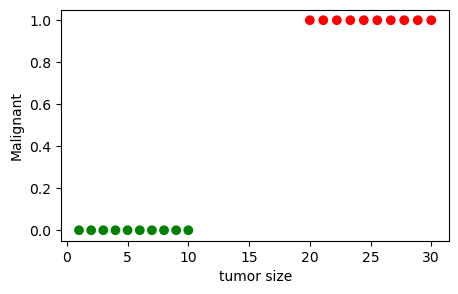

In [2]:
# Generate synthetic data
num = 10

x = np.concatenate([np.linspace(start=1, stop=10, num=num),np.linspace(start=20, stop=30, num=num)]); print('x.shape: ', x.shape)
y = np.concatenate([[0.]*num, [1.]*num]); print('y.shape', y.shape)

colors =['green']*num
for i in range(num):
    colors.append('red')

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors)
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.show()

x0.shape (20,)
X.shape (20, 2)
X_train.shape: (15, 2), y_train.shape: (15,) 
X_val.shape: (5, 2), y_val.shape: (5,) 


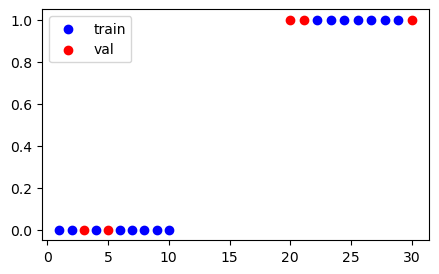

In [3]:
# add x0=1 term to X

x0 = np.ones_like(x); print('x0.shape', x0.shape)
X = np.stack([x0, x], axis=1); print('X.shape', X.shape)


# Divide dataset into train and val
val_percent = 0.25
n = x.shape[0]
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')


plt.figure(figsize = (5,3))
plt.scatter(X_train[:,1],y_train, color ='blue', label = 'train')
plt.scatter(X_val[:,1],y_val, color ='red', label = 'val')
plt.legend()
plt.show()

In [4]:
class BinaryLogisticRegressionGD:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, y, lr=0.0001, itrs = 100):
        # init params
        self.theta = np.random.randn(X.shape[1]) # shape: (X.shape[1],)
        n = y.shape[0]
        for itr in range(itrs):
            logit = X@self.theta
            y_hat = self._sigmoid(logit) # y_hat = X@self.theta For Linear Regression
            self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # update rule is same as LinearRegressionGD. In fact it is same for all GLMs
            
    def predict(self, x_test):
        logit = x_test@self.theta
        y_hat = self._sigmoid(logit)
        return logit, y_hat
    
    def loss(self, y_pred, y):
        log_likelihood = (np.mean(y*np.log(y_pred)) + np.mean((1-y)*np.log(1-y_pred)))
        nll_loss = -log_likelihood
        return nll_loss
    
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))
        

theta:  [-20.18163891   1.27751383]
Val loss:  -1.3575766960220803
1.0 -> 0.9988741577767388 -> 6.78809740406054
0.0 -> 1.0216712371118772e-06 -> -13.79406978206349
0.0 -> 7.937379887523512e-08 -> -16.34909743275475
1.0 -> 0.9953611428555337 -> 5.3686375981209515
1.0 -> 0.999999986809591 -> 18.14377585157725


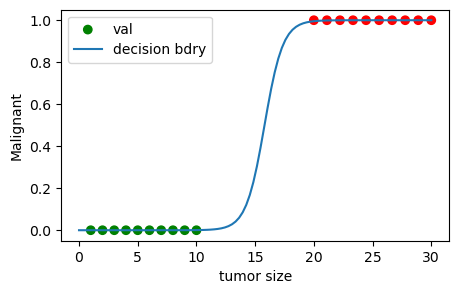

In [5]:
# Initialize model
model = BinaryLogisticRegressionGD()

# fit model
model.fit(X_train, y_train, lr=1, itrs = 1000)

# get params
print('theta: ', model.theta)

# predict on test/val set
logits, y_probabs = model.predict(X_val)

# get loss/ error

print('Val loss: ', model.loss(y_probabs, y_val))

# print side by side for comparison
for (gt, probab, logit) in zip(y_val, y_probabs, logits):
    print(f"{gt} -> {probab} -> {logit}")
    
    

# plot Decision Boundary

xs = np.linspace(0,30, 100)
x0s = np.ones_like(xs)
Xs = np.stack([x0s, xs], axis=1)
_,ys = model.predict(Xs)

plt.figure(figsize = (5,3))
plt.scatter(x,y, color = colors , label = 'val')
plt.plot(Xs[:,1], ys, label='decision bdry')
plt.xlabel('tumor size')
plt.ylabel('Malignant')
plt.legend()
plt.show()


### Multilabel classification

x.shape:  (300,)
y_true.shape (300,)


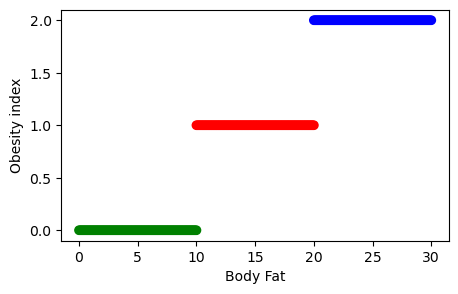

In [6]:
# Generate synthetic data
num = 100

x = np.concatenate([np.linspace(start=0, stop=10, num=num),np.linspace(start=10, stop=20, num=num),np.linspace(start=20, stop=30, num=num)]); print('x.shape: ', x.shape)
y_true = np.concatenate([[0.]*num, [1.]*num, [2.]*num]); print('y_true.shape', y_true.shape)

colors =['green']*num
for i in range(num):
    colors.append('red')
    
for i in range(num):
    colors.append('blue')

plt.figure(figsize = (5,3))
plt.scatter(x,y_true, color = colors)
plt.xlabel('Body Fat')
plt.ylabel('Obesity index')
plt.show()

In [9]:
# one-hot encode y
y = np.zeros((y_true.shape[0], 3))

for i, pos in enumerate(y_true):
    y[int(i), int(pos)] = 1.

print('Sample y: \n', y[:3])

# add x0=1 term to X
x0 = np.ones_like(x); print('x0.shape', x0.shape)
X = np.stack([x0, x], axis=1); print('X.shape', X.shape)


# Divide dataset into train and val
val_percent = 0.25
n = x.shape[0]
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')
    


Sample y: 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
x0.shape (300,)
X.shape (300, 2)
X_train.shape: (225, 2), y_train.shape: (225, 3) 
X_val.shape: (75, 2), y_val.shape: (75, 3) 


In [12]:
class LogisticRegressionGD:
    def __init__(self):
        self.theta = None
        
    def fit(self, X, y, lr=0.0001, itrs = 100):
        n = y.shape[0]
        n_classes = y.shape[1]
        
        # init params
        self.theta = np.random.randn(X.shape[1], n_classes) # shape: (X.shape[1],n_classes)
        for itr in range(itrs):
            logits = X@self.theta          # shape: (n, n_c)
            y_hat = self._softmax(logits)  # replace sigmoid with softmax
            self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # update rule is same as LinearRegressionGD. In fact it is same for all GLMs
            
    def predict(self, x_test):
        logits = x_test@self.theta
        y_hat = self._softmax(logits)
        return y_hat
    
    def loss(self, y_pred, y):
        return (np.sum(np.where(y==1, 1-y_pred, y_pred)))/(y.shape[0])
    
    def _softmax(self, logits):
        exp_logits = np.exp(logits)
        return exp_logits/np.sum(exp_logits, axis=1, keepdims=True)


        
        

In [14]:
# Initialize model
model = LogisticRegressionGD()

# fit model
model.fit(X_train, y_train, lr=0.03, itrs = 10000)

# get params
print('theta: ', model.theta)

# predict on test/val set
y_probabs = model.predict(X_val)


# print side by side for comparison
for (gt, probab) in zip(y_val, y_probabs):
    #print(f"{gt} -> {probab} :: {np.argmax(gt)} -> {np.argmax(probab)}")
    print(f"{np.argmax(gt)} -> {np.argmax(probab)}")
    
    
# loss
print('loss: ', model.loss(y_probabs, y_val))

y_pred_labels = np.argmax(y_probabs, axis=1)
y_true_labels = np.argmax(y_val, axis=1)
val_correct = (y_true_labels==y_pred_labels).sum()
val_acc = val_correct/y_val.shape[0]
print(f"val correct: {val_correct}/{y_val.shape[0]}, val acc: {val_acc}")

theta:  [[ 7.96148301  0.70632109 -8.56898888]
 [-1.12461751 -0.38747802  0.09049344]]
1 -> 1
0 -> 0
1 -> 1
2 -> 2
0 -> 0
2 -> 2
2 -> 2
0 -> 0
0 -> 0
2 -> 2
1 -> 1
2 -> 2
0 -> 0
1 -> 1
2 -> 2
0 -> 0
1 -> 1
2 -> 2
1 -> 1
2 -> 2
2 -> 2
2 -> 2
1 -> 1
0 -> 0
2 -> 2
1 -> 1
2 -> 2
1 -> 1
0 -> 0
1 -> 1
2 -> 2
1 -> 1
2 -> 2
0 -> 0
0 -> 0
1 -> 1
2 -> 2
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
1 -> 2
0 -> 0
2 -> 2
2 -> 2
1 -> 1
2 -> 2
0 -> 0
1 -> 1
0 -> 0
1 -> 1
1 -> 1
2 -> 2
1 -> 1
1 -> 1
1 -> 2
1 -> 2
2 -> 2
2 -> 2
2 -> 2
1 -> 1
0 -> 0
1 -> 1
2 -> 2
1 -> 1
2 -> 2
0 -> 0
1 -> 1
2 -> 2
0 -> 0
1 -> 1
1 -> 1
1 -> 1
loss:  0.3165961719121927
val correct: 72/75, val acc: 0.96


<a href="https://github.com/mgupta70/literature/blob/main/Logistic%20Regression.pdf"> Click here</a> for intriguing __Q&A__ on Logistic Regression :)